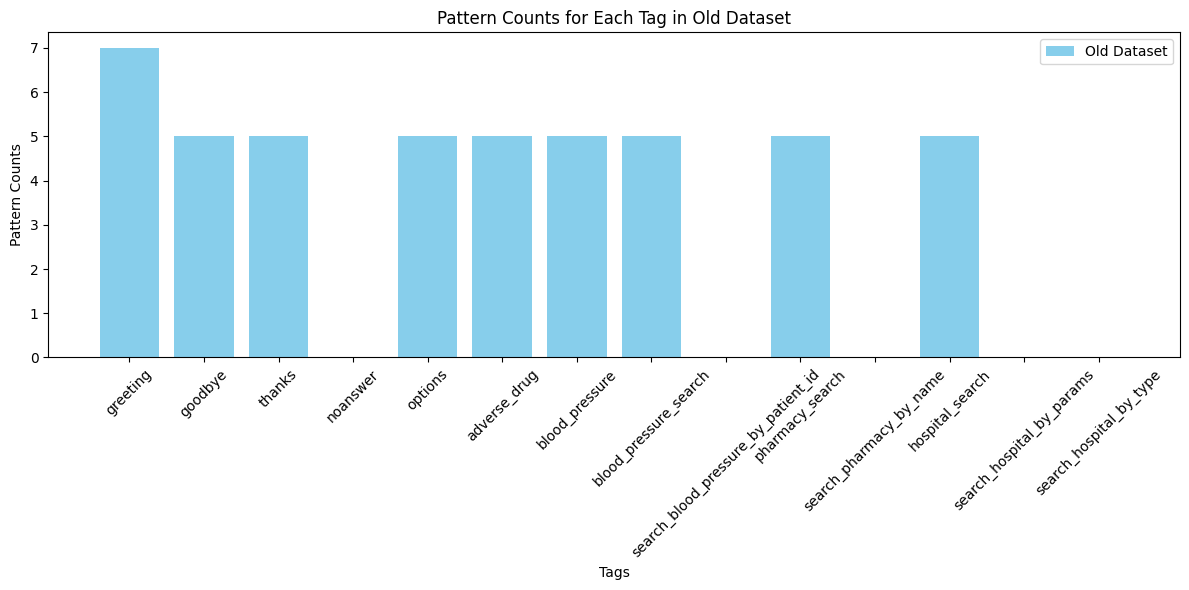

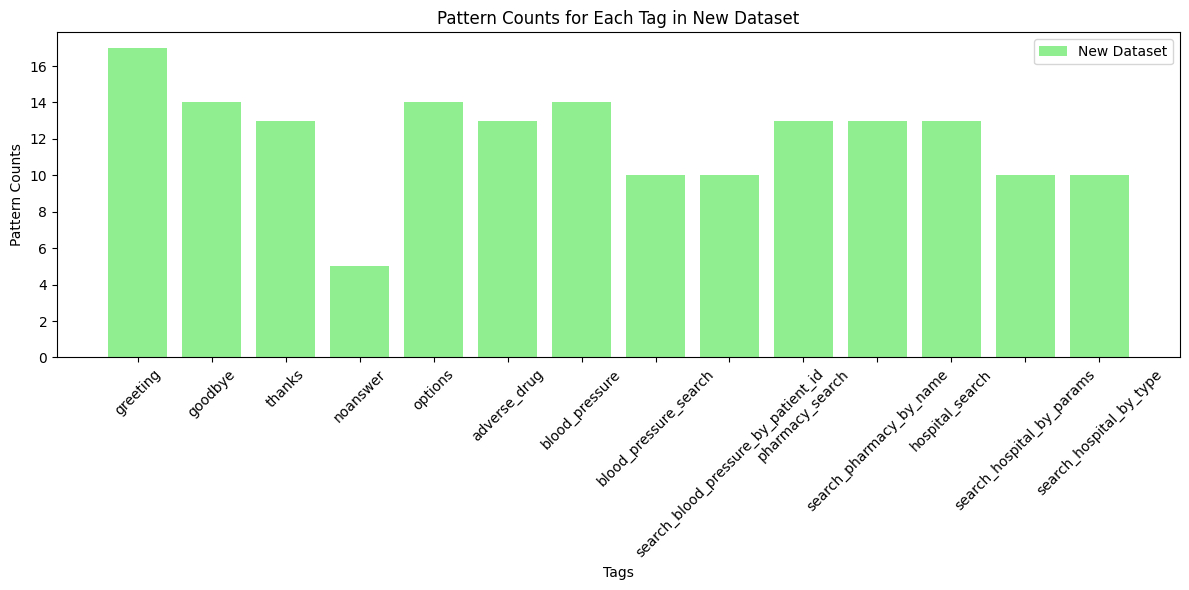

In [66]:
import json
import matplotlib.pyplot as plt

# Load data from old dataset
data1 = json.load(open('/content/intents-old.json'))

# Load data from new dataset
data2 = json.load(open('/content/intents.json'))

# Extract tags and their respective pattern counts for old dataset
tags1 = [intent['tag'] for intent in data1['intents']]
pattern_counts1 = [len(intent['patterns']) for intent in data1['intents']]

# Extract tags and their respective pattern counts for new dataset
tags2 = [intent['tag'] for intent in data2['intents']]
pattern_counts2 = [len(intent['patterns']) for intent in data2['intents']]

# Create bar chart for old dataset
plt.figure(figsize=(12, 6))
plt.bar(tags1, pattern_counts1, color='skyblue', label='Old Dataset')
plt.xlabel('Tags')
plt.ylabel('Pattern Counts')
plt.title('Pattern Counts for Each Tag in Old Dataset')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Create bar chart for new dataset
plt.figure(figsize=(12, 6))
plt.bar(tags2, pattern_counts2, color='lightgreen', label='New Dataset')
plt.xlabel('Tags')
plt.ylabel('Pattern Counts')
plt.title('Pattern Counts for Each Tag in New Dataset')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


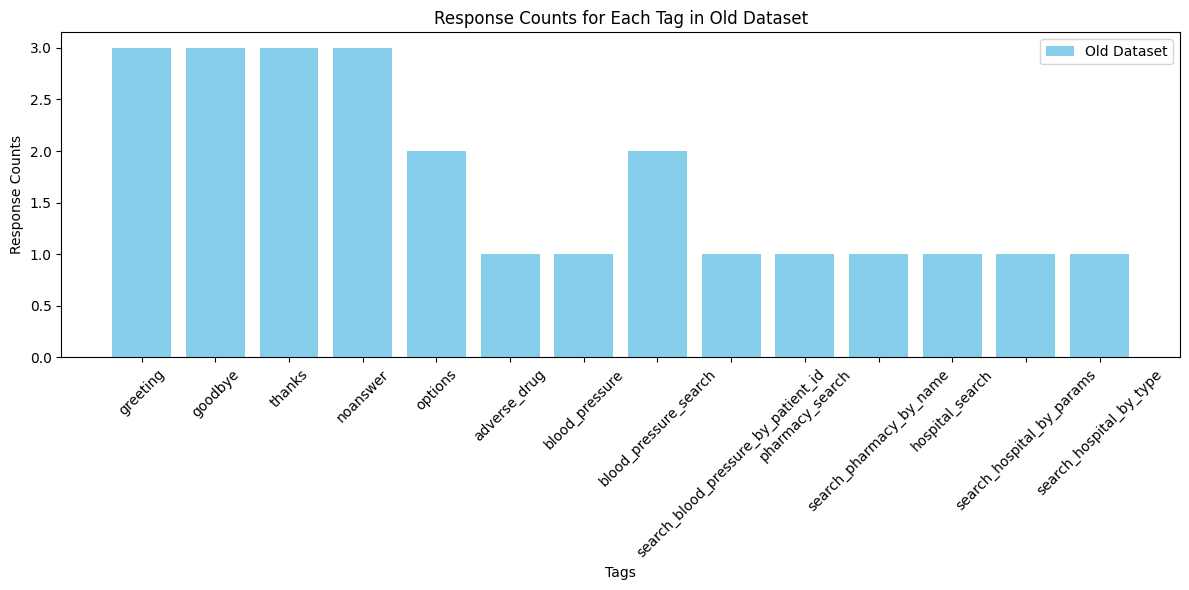

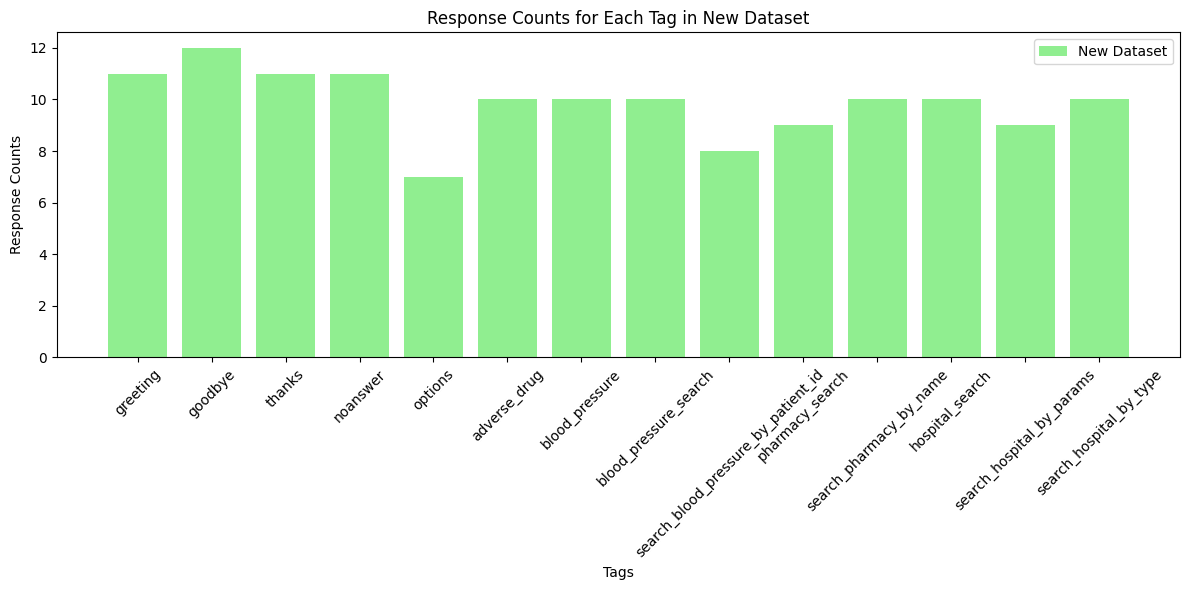

In [67]:
import json
import matplotlib.pyplot as plt

def extract_responses(data):
    tag_responses = {}
    for intent in data['intents']:
        tag_responses[intent['tag']] = len(intent['responses'])
    return tag_responses

# Load data from old dataset
data1 = json.load(open('/content/intents-old.json'))

# Load data from new dataset
data2 = json.load(open('/content/intents.json'))

# Extract responses for each tag in old dataset
tag_responses1 = extract_responses(data1)

# Extract responses for each tag in new dataset
tag_responses2 = extract_responses(data2)

# Create bar chart for old dataset
plt.figure(figsize=(12, 6))
plt.bar(tag_responses1.keys(), tag_responses1.values(), color='skyblue', label='Old Dataset')
plt.xlabel('Tags')
plt.ylabel('Response Counts')
plt.title('Response Counts for Each Tag in Old Dataset')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Create bar chart for new dataset
plt.figure(figsize=(12, 6))
plt.bar(tag_responses2.keys(), tag_responses2.values(), color='lightgreen', label='New Dataset')
plt.xlabel('Tags')
plt.ylabel('Response Counts')
plt.title('Response Counts for Each Tag in New Dataset')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [72]:
# importing modules
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import save_model

# Intent data
intents = json.load(open('/content/intents.json'))

# Extracting patterns and tags from intents
patterns = []
tags = []
for intent in intents['intents']:
    for pattern in intent['patterns']:
        patterns.append(' '.join(pattern.lower().split()))  # Preprocessing text
        tags.append(intent['tag'])

# Preparing data for training
data = pd.DataFrame({'patterns': patterns, 'tags': tags})

# Preprocessing training data
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
training_data_tfidf = vectorizer.fit_transform(data['patterns']).toarray()

le = LabelEncoder()
training_data_tags_dummy_encoded = le.fit_transform(data['tags'])

# Creating DNN
model = Sequential()
model.add(Dense(10, input_shape=(len(training_data_tfidf[0]),)))
model.add(Dense(8)) # Use one hidden layer as data is not very extensive
model.add(Dense(len(set(training_data_tags_dummy_encoded)), activation='softmax'))  # Adjust output neurons based on unique tags
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
model.fit(training_data_tfidf, training_data_tags_dummy_encoded, epochs=50, batch_size=32)

# Saving the model file
save_model(model, 'Hospital_Bot')


Epoch 1/50
6/6 [==============================] - 3s 6ms/step - loss: 2.6437 - accuracy: 0.0533
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 2.6292 - accuracy: 0.0947
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 2.6197 - accuracy: 0.1420
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 2.6105 - accuracy: 0.1361
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 2.6021 - accuracy: 0.1598
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 2.5937 - accuracy: 0.1893
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 2.5847 - accuracy: 0.2071
Epoch 8/50
6/6 [==============================] - 0s 8ms/step - loss: 2.5757 - accuracy: 0.2012
Epoch 9/50
6/6 [==============================] - 0s 10ms/step - loss: 2.5666 - accuracy: 0.1953
Epoch 10/50
6/6 [==============================] - 0s 7ms/step - loss: 2.5570 - accuracy: 0.2426
Epoch 11/50
6/6 [===================

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Extracting responses for each tag
responses = {}
for intent in intents['intents']:
    tag = intent['tag']
    tag_responses = intent.get('responses', [])
    responses[tag] = tag_responses


# Extracting patterns and tags from intents
patterns = []
tags = []
for intent in intents['intents']:
    for pattern in intent['patterns']:
        patterns.append(' '.join(pattern.lower().split()))  # Preprocessing text
        tags.append(intent['tag'])

# Preparing data for training
data = pd.DataFrame({'patterns': patterns, 'tags': tags})

# Fitting TfIdfVectorizer with training data to preprocess inputs
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words="english")
vectorizer.fit(data["patterns"])

# Fitting LabelEncoder with target variable(tags) for inverse transformation of predictions
le = LabelEncoder()
le.fit(data["tags"])

# Transforming input and predicting intent
def predict_tag(inp_str):
    inp_data_tfidf = vectorizer.transform([inp_str.lower()]).toarray()
    predicted_proba = model.predict(inp_data_tfidf)
    encoded_label = [np.argmax(predicted_proba)]
    predicted_tag = le.inverse_transform(encoded_label)[0]
    return predicted_tag

In [73]:
import random

# Defining chat function
def start_chat():
    print("---------------  Hospital Chatbot  ---------------")
    print("Welcome! How can I assist you today?")
    print("Type 'EXIT' to quit...")
    while True:
        inp = input("You: ")
        if inp.upper() == "EXIT":
            print("Hospital Chatbot: Goodbye! Take care.")
            break
        else:
            if inp:
                tag = predict_tag(inp)
                response = random.choice(responses[tag])
                print("Hospital Chatbot:", response)
            else:
                print("Hospital Chatbot: I didn't get that. Can you rephrase?")
# calling chat function to start chatting
start_chat()

---------------  Hospital Chatbot  ---------------
Welcome! How can I assist you today?
Type 'EXIT' to quit...
You: Hello there
1/1 [==============================] - 0s 65ms/step
Hospital Chatbot: Good evening, how can I help?
You: How can you assist me?
1/1 [==============================] - 0s 21ms/step
Hospital Chatbot: I'd be happy to assist you. Could you please provide more details?
You: What help you provide?
1/1 [==============================] - 0s 23ms/step
Hospital Chatbot: I can guide you through Adverse drug reaction list, Blood pressure tracking, Hospitals and Pharmacies
You: Open adverse drugs module
1/1 [==============================] - 0s 23ms/step
Hospital Chatbot: Navigating to Adverse drug reaction module
You: Blood pressure data entry
1/1 [==============================] - 0s 23ms/step
Hospital Chatbot: Sure, I can help with that. What specifically would you like to know?
You: Blood pressure data management
1/1 [==============================] - 0s 24ms/step
Hosp